In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Problema 1

In [2]:
def image_channel(img,option):
    alto = img.shape[0]
    ancho = img.shape[1]
    monocromo = np.zeros_like(img)
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            if option == 1:
                monocromo[i,j] = [0,0,blue]
            elif option == 2:
                monocromo[i,j] = [0,green,0]
            elif option == 3:
                monocromo[i,j] = [red,0,0]
            elif option == 10:
                monocromo[i,j] = [red,green,0]
            elif option == 20:
                monocromo[i,j] = [0,green,blue]
            elif option == 30:
                monocromo[i,j] = [red,0,blue]
            else:
                monocromo[i,j] = [red,green,blue]
    return monocromo
            
    


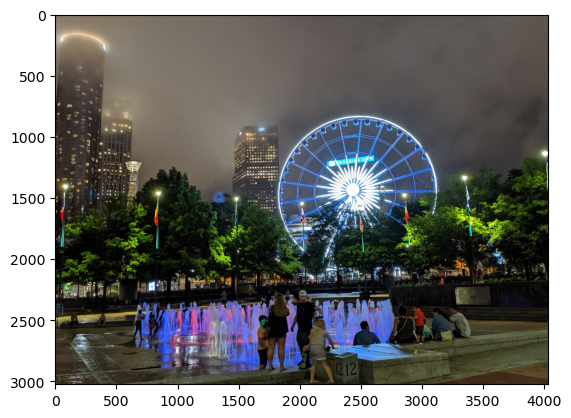

In [3]:
img = cv2.imread("img_prueba.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = image_channel(img,7)
plt.imshow(img2)
plt.show()

### Problema2

In [4]:
def image_reconstruction(imgR, imgG, imgB):
    
    # Asegurarse de que las imágenes de entrada tengan el mismo tamaño
    assert imgR.shape == imgG.shape == imgB.shape, "Las imágenes deben tener el mismo tamaño"

    # Crear una lista con las imágenes de entrada (grises)
    images = [imgB, imgG, imgR]

    # Combinar las imágenes en una sola imagen RGB
    color = cv2.merge([imgB, imgG, imgR])
            
    return color

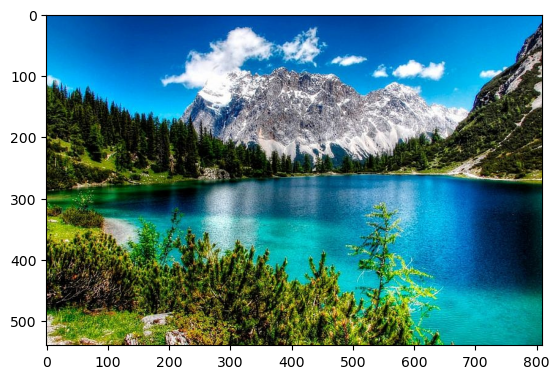

In [5]:
imgR = cv2.imread("imagen1\imagen1_salida_gray_rojo.jpg")
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
imgG = cv2.imread("imagen1\imagen1_salida_gray_verde.jpg")
imgG = cv2.cvtColor(imgG, cv2.COLOR_BGR2GRAY)
imgB = cv2.imread("imagen1\imagen1_salida_gray_azul.jpg")
imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
img2 = image_reconstruction(imgR,imgG,imgB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()


### Problema 3

In [6]:
def split_im(image):
    b, g, r = cv2.split(image)
    cv2.imwrite("prueba_r.jpg", r)
    cv2.imwrite("prueba_g.jpg", g)
    cv2.imwrite("prueba_b.jpg", b)
    return b,g,r

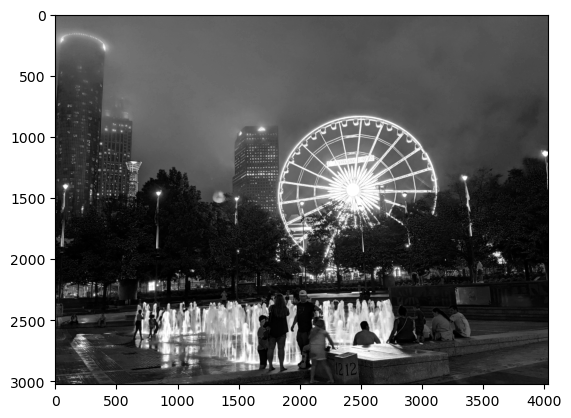

In [9]:
img3 = cv2.imread("img_prueba.jpg")
b,g,r = split_im(img3)
plt.imshow(b, cmap="gray")
plt.show()

### Problema 4

In [33]:
def hist_im(img):
    
    alto = img.shape[0]
    ancho = img.shape[1]
    gray1 = np.zeros((alto,ancho,1))

    
    color = ('b','g','r')

    for i, c in enumerate(color):
        hist = cv2.calcHist([img3], [i], None, [256], [0, 256])
        plt.plot(hist, color = c)
        plt.xlim([0,256])
    
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            
            gray1[i,j] = int((1/3)*red + (1/3)*green + (1/3)*blue)
    hist2, bins = np.histogram(gray1.ravel(), bins=256, range=[0, 256])
    # Mostrar el histograma utilizando Matplotlib
    plt.plot(hist2, color='y')
    plt.xlim([0, 256])
    plt.title('Histograma de la Imagen en Escala de Grises')
    plt.xlabel('Nivel de Gris')
    plt.ylabel('Frecuencia')
    plt.show()
    return 

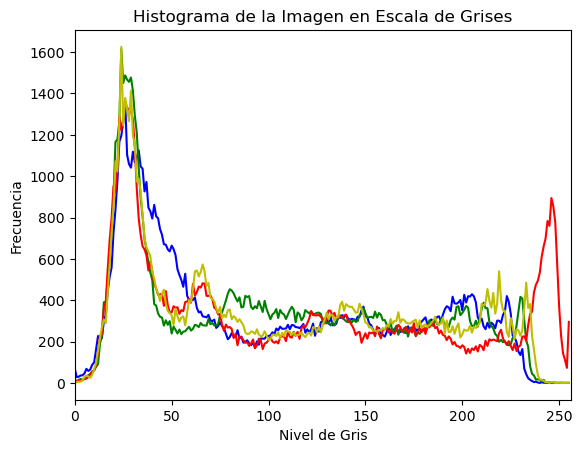

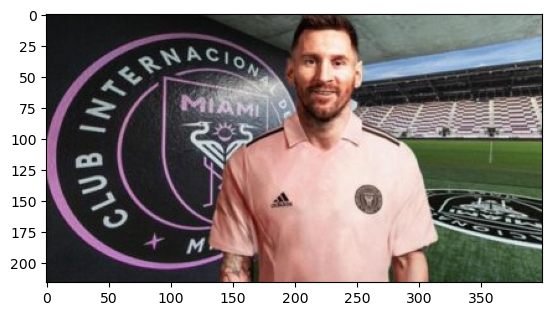

In [35]:
img3 = cv2.imread("messi-miami.jpg")
hist_im(img3)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3)
plt.show()


